<a href="https://colab.research.google.com/github/pavelpryadokhin/Regression/blob/main/NBA_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Прогнозирование количество забитых мячей

Давайте рассмотрим статистику матчей NBA и узнаем, насколько точно можно предсказать количество забитых мячей в каждом из них. Для этого мы воспользуемся историческими данными за прошлые годы, чтобы спрогнозировать результат для каждой команды по отдельности. Затем мы сложим эти прогнозы, чтобы получить общее количество голов, забитых в матче.

#Информация о командах

In [ ]:
team_info_old ={'Даллас Маверикс': ['Американ Эйрлайнс Центр', ['Lively Дерек', 'Пауэлл Дуайт', 'Hardy Джаден', 'Williams Брендон', 'Граймс Квентин', 'Динвидди Спенсер', 'Ирвинг Кайри', 'Лоусон A.J.', 'Томпсон Клей', 'Экзам Данте', 'Fudge Alex', 'Prosper Olivier-Maxence', 'Вашингтон Пи-Джей', 'Гэффорд Дэниэл', 'Дончич Лука', 'Клебер Макс', 'Маршалл Наджи', 'Моррис Маркифф', 'Эдвардс Кесслер', 'Кидд Джейсон', 'Lively Дерек', 'Пауэлл Дуайт', 'Hardy Джаден', 'Williams Брендон', 'Граймс Квентин', 'Динвидди Спенсер', 'Ирвинг Кайри', 'Лоусон A.J.', 'Томпсон Клей', 'Экзам Данте', 'Fudge Alex', 'Prosper Olivier-Maxence', 'Вашингтон Пи-Джей', 'Гэффорд Дэниэл', 'Дончич Лука', 'Клебер Макс', 'Маршалл Наджи', 'Моррис Маркифф', 'Эдвардс Кесслер', 'Кидд Джейсон']], 'Денвер Наггетс': ['Болл Арена', ['Bediako Диас де Оливейра', 'Джордан Деандре', 'Йокич Никола', 'Braun Christian', 'Key Брэкстон', 'Pickett Jalen', 'Мюррэй Джамал', 'Ричардсон Will', 'Уотсон Пэйтон', 'Уэстбрук Расселл', 'Холидей Джастин', 'Strawther Julian Lee', 'Tyson Хантер', 'Гордон Арон', 'Ннаджи Зеке', 'Портер-мл. Майкл', 'Чанчар Влатко', 'Шарич Дарио', 'Мэлоун Майкл', 'Bediako Диас де Оливейра', 'Джордан Деандре', 'Йокич Никола', 'Braun Christian', 'Key Брэкстон', 'Pickett Jalen', 'Мюррэй Джамал', 'Ричардсон Will', 'Уотсон Пэйтон', 'Уэстбрук Расселл', 'Холидей Джастин', 'Strawther Julian Lee', 'Tyson Хантер', 'Гордон Арон', 'Ннаджи Зеке', 'Портер-мл. Майкл', 'Чанчар Влатко', 'Шарич Дарио', 'Мэлоун Майкл']], 'Хьюстон Рокетс': ['Тойота', ['Адамс Стивен', 'Ландейл Джок', 'Мэйкер Тон', 'Шенгюн Алперен', 'Nowell Markquis', 'Ванвлит Фред', 'Грин Джален', 'Хинтон Нейт', 'Холидей Аарон', 'Eason Tari', 'Griffin AJ', 'Samuels Jermaine', 'Thompson Amen', 'Whitmore Кэм', 'Williams Jeenathan', 'Брукс Диллон', 'Буллок Реджи', 'Грин Джефф', 'Маквей Джек', 'Смит-мл. Jabari', 'Тейт Джейшон', 'Удока Име', 'Адамс Стивен', 'Ландейл Джок', 'Мэйкер Тон', 'Шенгюн Алперен', 'Nowell Markquis', 'Ванвлит Фред', 'Грин Джален', 'Хинтон Нейт', 'Холидей Аарон', 'Eason Tari', 'Griffin AJ', 'Samuels Jermaine', 'Thompson Amen', 'Whitmore Кэм', 'Williams Jeenathan', 'Брукс Диллон', 'Буллок Реджи', 'Грин Джефф', 'Маквей Джек', 'Смит-мл. Jabari', 'Тейт Джейшон', 'Удока Име']], 'Лос-Анджелес Клипперс': ['Intuit Dome', ['Бамба Мохамед', 'Зубац Ивица', 'Miller Джордан', 'Браун Kobe', 'Данн Крис', 'Дарлинг Нейт', 'Коффи Амир', 'Пауэлл Норман', 'Хайлэнд Нашон', 'Харден Джеймс', 'Харклес Элиа', 'Батюм Николя', 'Джонс Деррик', 'Джонс Кай', 'Леонард Кавай', 'Манн Теренс', 'Портер-мл. Кевин', 'Такер Пи Джей', 'Лью Тайрон', 'Бамба Мохамед', 'Зубац Ивица', 'Miller Джордан', 'Браун Kobe', 'Данн Крис', 'Дарлинг Нейт', 'Коффи Амир', 'Пауэлл Норман', 'Хайлэнд Нашон', 'Харден Джеймс', 'Харклес Элиа', 'Батюм Николя', 'Джонс Деррик', 'Джонс Кай', 'Леонард Кавай', 'Манн Теренс', 'Портер-мл. Кевин', 'Такер Пи Джей', 'Лью Тайрон']], 'Лос-Анджелес Лейкерс': ['Crypto.com Арена', ['Castleton Колин', 'Koloko Christian Junior', 'Вуд Кристиан', 'Келли Kylor', 'Хейс Джексон', 'Christie Максим', 'Hood-Schifino Jalen', 'Винсент Гейб', 'Гудвин Джордан', "Расселл Д'Анджело", 'Ривз Остин', 'Вандербилт Джарред', 'Джеймс Леброн', 'Джонс Dahntay', 'Дэвис Энтони', 'Льюис Максвелл', 'Реддиш Кэмерон', 'Хатимура Руи', 'Редик JJ', 'Castleton Колин', 'Koloko Christian Junior', 'Вуд Кристиан', 'Келли Kylor', 'Хейс Джексон', 'Christie Максим', 'Hood-Schifino Jalen', 'Винсент Гейб', 'Гудвин Джордан', "Расселл Д'Анджело", 'Ривз Остин', 'Вандербилт Джарред', 'Джеймс Леброн', 'Джонс Dahntay', 'Дэвис Энтони', 'Льюис Максвелл', 'Реддиш Кэмерон', 'Хатимура Руи', 'Редик JJ']], 'Мемфис Гриззлис': ['ФедЭксФорум', ['Edey Зак', 'Альдама Санти', 'Хафф Джей', 'Kawamura Yuki', 'Pippen Jr Scotty', 'Williams Vince', 'Бэйн Десмонд', 'Жарро Деджон', 'Кеннард Люк', 'Кончар Джон', 'Морант Джа', 'Они Мийе', 'Смарт Маркус', 'Cardoso Pereira Joao Marello', 'LaRavia Джейкоб', 'Джексон Gregory', 'Джексон Джарен', 'Кларк Брэндон', 'Дженкинс Тейлор', 'Edey Зак', 'Альдама Санти', 'Хафф Джей', 'Kawamura Yuki', 'Pippen Jr Scotty', 'Williams Vince', 'Бэйн Десмонд', 'Жарро Деджон', 'Кеннард Люк', 'Кончар Джон', 'Морант Джа', 'Они Мийе', 'Смарт Маркус', 'Cardoso Pereira Joao Marello', 'LaRavia Джейкоб', 'Джексон Gregory', 'Джексон Джарен', 'Кларк Брэндон', 'Дженкинс Тейлор']], 'Миннесота Тимбервулвз': ['Таргет Центр', ['Гарза Лука', 'Гобер Руди', 'Райд Наз', 'Александер-Уокер Никейл', 'Дивинченцо Донте', 'Дозье Пи-Джей', 'Кларк Джейлин', 'Конли Майк', 'Морелли Rob', 'Мэйз Скайлар', 'Никс Дайшон', 'Эдвардс Энтони', 'LeDee Джэдон', 'Shannon Jr. Терренс', 'Бэйтс-Диоп Кейта', 'Инглс Джо', 'Макдэниелс Джейден', 'Миллер Леонард', 'Минотт Джош', 'Оморуи Юджин', 'Рэндл Джулиус', 'Финч Крис', 'Гарза Лука', 'Гобер Руди', 'Райд Наз', 'Александер-Уокер Никейл', 'Дивинченцо Донте', 'Дозье Пи-Джей', 'Кларк Джейлин', 'Конли Майк', 'Морелли Rob', 'Мэйз Скайлар', 'Никс Дайшон', 'Эдвардс Энтони', 'LeDee Джэдон', 'Shannon Jr. Терренс', 'Бэйтс-Диоп Кейта', 'Инглс Джо', 'Макдэниелс Джейден', 'Миллер Леонард', 'Минотт Джош', 'Оморуи Юджин', 'Рэндл Джулиус', 'Финч Крис']], 'Нью-Орлеан Пеликанс': ['Смузи Кинг Центр', ['Jemison Трей', 'Missi Yves', 'Тайс Даниэль', 'Arms Adonis', 'Brockington Izaiah', 'Couisnard Джермейн', 'Crutcher Jalen', 'Hawkins Джордан', 'Альварадо Жозе', 'Грин Джавонте', 'Джонс Герберт', 'Макколлум Си Джей', 'Маррей Деджанте', 'Пейтон Элфрид', 'Хилл Малкольм', 'Cain Jamal', 'Matkovic Karlo', 'Oduro Josh', 'Reeves Antonio', 'Ингрэм Брэндон', 'Мерфи Трэй', 'Райан Мэтт', 'Робинсон Джеремайя', 'Уильямсон Зайон', 'Грин Уилли', 'Jemison Трей', 'Missi Yves', 'Тайс Даниэль', 'Arms Adonis', 'Brockington Izaiah', 'Couisnard Джермейн', 'Crutcher Jalen', 'Hawkins Джордан', 'Альварадо Жозе', 'Грин Джавонте', 'Джонс Герберт', 'Макколлум Си Джей', 'Маррей Деджанте', 'Пейтон Элфрид', 'Хилл Малкольм', 'Cain Jamal', 'Matkovic Karlo', 'Oduro Josh', 'Reeves Antonio', 'Ингрэм Брэндон', 'Мерфи Трэй', 'Райан Мэтт', 'Робинсон Джеремайя', 'Уильямсон Зайон', 'Грин Уилли']], 'Финикс Санс': ['Футпринт Центр', ['Бол Бол', 'Камински Фрэнк', 'Нуркич Юсуф', 'Пламли Мэйсон', 'Gillespie Collin', 'Washington Tyty', 'Аллен Грэйсон', 'Бил Брэдли', 'Букер Девин', 'Джонс Тайс', 'Ли Дэмион Ли', 'Льюис Мэтт', 'Моррис Монте', 'Окоги Джошуа', 'Томас Исайя', 'Диаките Мамади', 'Дюрант Кевин', "О'Нил Ройс", 'Янг Таддеус', 'Буденхольцер Майк', 'Бол Бол', 'Камински Фрэнк', 'Нуркич Юсуф', 'Пламли Мэйсон', 'Gillespie Collin', 'Washington Tyty', 'Аллен Грэйсон', 'Бил Брэдли', 'Букер Девин', 'Джонс Тайс', 'Ли Дэмион Ли', 'Льюис Мэтт', 'Моррис Монте', 'Окоги Джошуа', 'Томас Исайя', 'Диаките Мамади', 'Дюрант Кевин', "О'Нил Ройс", 'Янг Таддеус', 'Буденхольцер Майк']], 'Портленд Трэйл Блэйзерс': ['Мода Центр', ['Clingan Donovan', 'Баджи Ибу', 'Эйтон Деандре', 'Henderson Scoot', 'Moore Taze', 'Бэнтон Далано', 'Грэм Девонте', 'Руперт Rayan', 'Саймонс Анферни', 'Тибул Матис', 'Camara Toumani', 'Minaya Джастин', 'Murray Kris', 'Sharpe Shaedon', 'Walker Jabari', 'Авдия Дени', 'Грант Джерами', 'Рит Дуоп', 'Уильямс Роберт', 'Биллапс Чонси', 'Clingan Donovan', 'Баджи Ибу', 'Эйтон Деандре', 'Henderson Scoot', 'Moore Taze', 'Бэнтон Далано', 'Грэм Девонте', 'Руперт Rayan', 'Саймонс Анферни', 'Тибул Матис', 'Camara Toumani', 'Minaya Джастин', 'Murray Kris', 'Sharpe Shaedon', 'Walker Jabari', 'Авдия Дени', 'Грант Джерами', 'Рит Дуоп', 'Уильямс Роберт', 'Биллапс Чонси']], 'Сакраменто Кингз': ['Голден 1 Арена', ['Лень Алекс', 'Макги Джавейл', 'Дерозан Демар', 'Джонс Исаак', 'Джонс Мэйсон', 'Маклафлин Джордан', 'Монк Малик', 'Томас Бродрик', 'Тэйлор Терри', 'Фокс Де’Аарон', 'Хьюртер Кевин', 'Эллис Boogie', 'Эллис Keon', 'Murray Keegan', 'Robinson Orlando', 'Джонс Колби', 'Кроуфорд Исая', 'Лабиссье Скал', 'Лайлз Трей', 'Макдэниелс Джален', 'Сабонис Домантас', 'Браун Майк', 'Лень Алекс', 'Макги Джавейл', 'Дерозан Демар', 'Джонс Исаак', 'Джонс Мэйсон', 'Маклафлин Джордан', 'Монк Малик', 'Томас Бродрик', 'Тэйлор Терри', 'Фокс Де’Аарон', 'Хьюртер Кевин', 'Эллис Boogie', 'Эллис Keon', 'Murray Keegan', 'Robinson Orlando', 'Джонс Колби', 'Кроуфорд Исая', 'Лабиссье Скал', 'Лайлз Трей', 'Макдэниелс Джален', 'Сабонис Домантас', 'Браун Майк']], 'Сан-Антонио Спёрс': ['Центр Фрост Банк', ['Wembanyama Victor', 'Бэсси Чарльз', 'Bouyea Jamaree', 'Branham Malaki', 'Castle Stephon', 'Sochan Jeremy', 'Wesley Blake', 'Бостон Брэндон', 'Джонс Тре', 'Дьюк Дэвид', 'Пол Крис', 'Сиссоко Сиди', 'Флинн Малачи', 'Minix Рики', 'Барнс Харрисон', 'Джонсон Келдон', 'Ингрэм Харрисон', 'Коллинс Зак', 'Мамукелашвили Сандро', 'Менса Nathan', 'Шампэйн Julian', 'Попович Грегг', 'Wembanyama Victor', 'Бэсси Чарльз', 'Bouyea Jamaree', 'Branham Malaki', 'Castle Stephon', 'Sochan Jeremy', 'Wesley Blake', 'Бостон Брэндон', 'Джонс Тре', 'Дьюк Дэвид', 'Пол Крис', 'Сиссоко Сиди', 'Флинн Малачи', 'Minix Рики', 'Барнс Харрисон', 'Джонсон Келдон', 'Ингрэм Харрисон', 'Коллинс Зак', 'Мамукелашвили Сандро', 'Менса Nathan', 'Шампэйн Julian', 'Попович Грегг']], 'Юта Джаз': ['Вивинт Арена', ['Kessler Уокер', 'Tshiebwe Oscar', 'Bailey Bryan', 'George Keyonte', 'Juzang Джон', 'Kinsey Taevion', 'Wong Исая', 'Кларксон Джордан', 'Миллс Патти', 'Секстон Коллин', 'Sensabaugh Brice', 'Williams Коди', 'Коллинз Джон', 'Маркканен Лаури', 'Михайлюк Святослав', 'Портер Мика', 'Саманич Лука', 'Хендрикс Тейлор', 'Юбэнкс Дрю', 'Харди Уильям', 'Kessler Уокер', 'Tshiebwe Oscar', 'Bailey Bryan', 'George Keyonte', 'Juzang Джон', 'Kinsey Taevion', 'Wong Исая', 'Кларксон Джордан', 'Миллс Патти', 'Секстон Коллин', 'Sensabaugh Brice', 'Williams Коди', 'Коллинз Джон', 'Маркканен Лаури', 'Михайлюк Святослав', 'Портер Мика', 'Саманич Лука', 'Хендрикс Тейлор', 'Юбэнкс Дрю', 'Харди Уильям']], 'Голден Стэйт Уорриорз': ['Чейз Центр', ['Jackson-Davis Trayce', 'Луни Кевон', 'Beekman', 'Podziemski Brandin', 'Waters III Линди', 'Карри Стефен', "Мелтон Де'Энтони", 'Муди Мозес', 'Пэйтон Гэри', 'Спенсер Патрик', 'Хилд Бадди', 'Post Квинтен', 'Аиртон Руй', 'Андерсон Кайл', 'Грант', 'Грин Дрэймонд', 'Куминга Джонатан', 'Нокс Кевин', 'Роу Джексон', 'Уиггинс Эндрю', 'Керр Стив', 'Jackson-Davis Trayce', 'Луни Кевон', 'Beekman', 'Podziemski Brandin', 'Waters III Линди', 'Карри Стефен', "Мелтон Де'Энтони", 'Муди Мозес', 'Пэйтон Гэри', 'Спенсер Патрик', 'Хилд Бадди', 'Post Квинтен', 'Аиртон Руй', 'Андерсон Кайл', 'Грант', 'Грин Дрэймонд', 'Куминга Джонатан', 'Нокс Кевин', 'Роу Джексон', 'Уиггинс Эндрю', 'Керр Стив']], 'Оклахома-Сити Тандер': ['Пэйком Центр', ['Reese Alexander', 'Бийомбо Бисмак', 'Мускала Майк', 'Хартенштайн Айзея', 'Хольмгрен Chet', 'Ducas Alex', 'Topic Nikola', 'Williams Джаден', 'Гилджес-Александер Шэй', 'Джо Айзея', 'Дорт Лугенц', 'Карузо Алекс', 'Митчелл Ajay', 'Уиггинс Арон', 'Уоллас Cason', 'Kopp Миллер', 'Leons Malevy', 'Williams Jaylin', 'Дьенг Усман', 'Уильямс Кенрих', 'Хэйуорд Гордон', 'Дэйнолт Марк', 'Reese Alexander', 'Бийомбо Бисмак', 'Мускала Майк', 'Хартенштайн Айзея', 'Хольмгрен Chet', 'Ducas Alex', 'Topic Nikola', 'Williams Джаден', 'Гилджес-Александер Шэй', 'Джо Айзея', 'Дорт Лугенц', 'Карузо Алекс', 'Митчелл Ajay', 'Уиггинс Арон', 'Уоллас Cason', 'Kopp Миллер', 'Leons Malevy', 'Williams Jaylin', 'Дьенг Усман', 'Уильямс Кенрих', 'Хэйуорд Гордон', 'Дэйнолт Марк']], 'Атланта Хокс': ['Стейт Фарм Арена', ['Гуйе Мухамед', 'Капела Клинт', 'Bufkin Kobe', 'Daniels Dyson', 'Plowden Daeqwon', 'Богданович Богдан', 'Крейчи Вит', 'Мэттьюз Уэсли', 'Мэтьюз Гаррисон', 'Уоллас Keaton', 'Харрис Кевон', 'Янг Трей', 'Barlow Доминик', 'Lundy Сет', 'Risacher Zaccharie', 'Roddy Давид', 'Джонсон Джален', 'Нэнс-мл. Ларри', 'Хантер Деандре', 'Снайдер Квин', 'Гуйе Мухамед', 'Капела Клинт', 'Bufkin Kobe', 'Daniels Dyson', 'Plowden Daeqwon', 'Богданович Богдан', 'Крейчи Вит', 'Мэттьюз Уэсли', 'Мэтьюз Гаррисон', 'Уоллас Keaton', 'Харрис Кевон', 'Янг Трей', 'Barlow Доминик', 'Lundy Сет', 'Risacher Zaccharie', 'Roddy Давид', 'Джонсон Джален', 'Нэнс-мл. Ларри', 'Хантер Деандре', 'Снайдер Квин']], 'Бостон Селтикс': ['ТД Гарден', ['Queta Neemias', 'Skapintsev Dmytro', 'Корнет Люк', 'Хорфорд Эл', 'Davison JD', 'Walsh Джордан', 'Браун Джейлен', 'Притчард Пэйтон', 'Скрабб Джей', 'Спрингер Джаден', 'Уайт Деррик', 'Уокер Лонни', 'Холидей Джру', 'Бриссетт Ошаэ', 'Петерсон Дрю', 'Порзингис Кристапс', 'Тейтум Джейсон', 'Тиллман Хавьер', 'Харпер Роналд', 'Хаузер Сэм', 'Маццулла Джо', 'Queta Neemias', 'Skapintsev Dmytro', 'Корнет Люк', 'Хорфорд Эл', 'Davison JD', 'Walsh Джордан', 'Браун Джейлен', 'Притчард Пэйтон', 'Скрабб Джей', 'Спрингер Джаден', 'Уайт Деррик', 'Уокер Лонни', 'Холидей Джру', 'Бриссетт Ошаэ', 'Петерсон Дрю', 'Порзингис Кристапс', 'Тейтум Джейсон', 'Тиллман Хавьер', 'Харпер Роналд', 'Хаузер Сэм', 'Маццулла Джо']], 'Шарлотт Хорнетс': ['Спектрум Центр', ['Diabate Мусса', 'Джайлз Харри', 'Ричардс Ник', 'Battle RaeQuan', 'Brown Charlie', 'Johnson Keyontae', 'Simpson KJ', 'Болл Ламело', 'Вашингтон Дуэйн', 'Грин Джошуа', 'Джефрис Дакуан', 'Карри Сет', 'Манн Тре', 'Мичич Василие', 'Прайд Шарль', 'Смит Nick', 'Miller Брендон', 'Salaun Тиджане', 'Бриджес Майлз', 'Гибсон Тадж', 'Мартин Коди', 'Уильямс Грант', 'Халл Малик', 'Ли Чарльз', 'Diabate Мусса', 'Джайлз Харри', 'Ричардс Ник', 'Battle RaeQuan', 'Brown Charlie', 'Johnson Keyontae', 'Simpson KJ', 'Болл Ламело', 'Вашингтон Дуэйн', 'Грин Джошуа', 'Джефрис Дакуан', 'Карри Сет', 'Манн Тре', 'Мичич Василие', 'Прайд Шарль', 'Смит Nick', 'Miller Брендон', 'Salaun Тиджане', 'Бриджес Майлз', 'Гибсон Тадж', 'Мартин Коди', 'Уильямс Грант', 'Халл Малик', 'Ли Чарльз']], 'Чикаго Буллз': ['Юнайтед Центр', ['Вучевич Никола', 'Саного Adama', 'Смит Джален', 'Domask Маркус', 'Drell Анри', 'Giddey Джош', 'Terry Dalen', 'Болл Лонзо', 'Досунму Айо', 'Дуарте Крис', 'Картер Джевон', 'Лавин Зак', 'Стюард Ди-Джей', 'Уайт Коби', 'Хортон-Такер Тален', 'Liddell EJ', 'Lofton Кеннет', 'Phillips Julian', 'Битим Онуралп', 'Крэйг Торри', 'Уильямс Патрик', 'Донован Билли', 'Вучевич Никола', 'Саного Adama', 'Смит Джален', 'Domask Маркус', 'Drell Анри', 'Giddey Джош', 'Terry Dalen', 'Болл Лонзо', 'Досунму Айо', 'Дуарте Крис', 'Картер Джевон', 'Лавин Зак', 'Стюард Ди-Джей', 'Уайт Коби', 'Хортон-Такер Тален', 'Liddell EJ', 'Lofton Кеннет', 'Phillips Julian', 'Битим Онуралп', 'Крэйг Торри', 'Уильямс Патрик', 'Донован Билли']], 'Кливленд Кавальерс': ['Рокет Мортгейдж ФилдХауз', ['Аллен Джарретт', 'Мобли Эван', 'Bernard Jules', 'Gilyard Jacob', 'Гарленд Дариус', 'Джером Тай', 'Меррилл Сэм', 'Митчелл Донован', 'Портер Craig', 'Смит Смит', 'Струс Макс', 'Bates Emoni', 'Tyson Jaylon', 'ЛеВерт Карис', 'Моррис Маркус', 'Нианг Джорджес', 'Окоро Исаак', 'Томпсон Тристан', 'Тор Джей-Ти', 'Траверс Люк', 'Уэйд Дин', 'Аткинсон Кенни', 'Аллен Джарретт', 'Мобли Эван', 'Bernard Jules', 'Gilyard Jacob', 'Гарленд Дариус', 'Джером Тай', 'Меррилл Сэм', 'Митчелл Донован', 'Портер Craig', 'Смит Смит', 'Струс Макс', 'Bates Emoni', 'Tyson Jaylon', 'ЛеВерт Карис', 'Моррис Маркус', 'Нианг Джорджес', 'Окоро Исаак', 'Томпсон Тристан', 'Тор Джей-Ти', 'Траверс Люк', 'Уэйд Дин', 'Аткинсон Кенни']], 'Детройт Пистонс': ['Литл Сесарс Арена', ['Duren Джаден', 'Стюарт Айзея', 'Jenkins Daniss', 'McCoy Javante', 'Sasser Маркус', 'Seabron Dereon', 'Бизли Малик', 'Иви Джейден', 'Каннингем Кейд', 'Мур Венделл', 'Хардуэй Тим', 'Evbuomwan Tosan', 'Klintman Bobi', 'Thompson Ausar', 'Рид Пол', 'Стивенс Ламар', 'Фонтеккио Симоне', 'Харрис Тобиас', 'Бикерстафф Джей Би', 'Duren Джаден', 'Стюарт Айзея', 'Jenkins Daniss', 'McCoy Javante', 'Sasser Маркус', 'Seabron Dereon', 'Бизли Малик', 'Иви Джейден', 'Каннингем Кейд', 'Мур Венделл', 'Хардуэй Тим', 'Evbuomwan Tosan', 'Klintman Bobi', 'Thompson Ausar', 'Рид Пол', 'Стивенс Ламар', 'Фонтеккио Симоне', 'Харрис Тобиас', 'Бикерстафф Джей Би']], 'Индиана Пэйсерс': ['Гейнбридж Филдаус', ['Вайзман Джеймс', 'Тернер Майлс', 'Sheppard Ben', 'Макконнелл Ти Джей', 'Нембхард Эндрю', 'Хэлибертон Тайриз', 'Mathurin Bennedict', 'Swider Cole', 'Браун Kendall', 'Джексон Айзея', 'Джонсон Джеймс', 'Макдермотт Даг', 'Несмит Аарон', 'Сиакам Паскаль', 'Топпин Оби', 'Уокер Jarace', 'Карлайл Рик', 'Вайзман Джеймс', 'Тернер Майлс', 'Sheppard Ben', 'Макконнелл Ти Джей', 'Нембхард Эндрю', 'Хэлибертон Тайриз', 'Mathurin Bennedict', 'Swider Cole', 'Браун Kendall', 'Джексон Айзея', 'Джонсон Джеймс', 'Макдермотт Даг', 'Несмит Аарон', 'Сиакам Паскаль', 'Топпин Оби', 'Уокер Jarace', 'Карлайл Рик']], 'Майами Хит': ['Касейя Центр', ["Ware Kel'el", 'Адебайо Бэм', 'Брайант Томас', 'Йович Nikola', 'Pullin Zyon', 'Stevens Айзея', 'Батлер Джимми', 'Бёркс Алек', 'Дэниэлс Сэмюэль', 'Кристофер Джошуа', 'Ларссон Пелле', 'Ричарсон Джош', 'Робинсон Данкан', 'Розье Терри', 'Смит Дрю', 'Уоррен Bryson', 'Хирро Тайлер', 'Butler Caron', 'Jaquez Jr. Хайме', 'Johnson Keshad', 'Washington Warren', 'Лав Кевин', 'Литтл Нассир', 'Хайсмит Хейвуд', 'Споэльстра Эрик', "Ware Kel'el", 'Адебайо Бэм', 'Брайант Томас', 'Йович Nikola', 'Pullin Zyon', 'Stevens Айзея', 'Батлер Джимми', 'Бёркс Алек', 'Дэниэлс Сэмюэль', 'Кристофер Джошуа', 'Ларссон Пелле', 'Ричарсон Джош', 'Робинсон Данкан', 'Розье Терри', 'Смит Дрю', 'Уоррен Bryson', 'Хирро Тайлер', 'Butler Caron', 'Jaquez Jr. Хайме', 'Johnson Keshad', 'Washington Warren', 'Лав Кевин', 'Литтл Нассир', 'Хайсмит Хейвуд', 'Споэльстра Эрик']], 'Милуоки Бакс': ['Фисерв Форум', ['Robbins Лиэм', 'Лопес Брук', 'Пасечникс Анджейс', 'Akinjo Джеймс', 'Chaplin Jamir', 'Rollins Ryan', 'Umude Stanley', 'Грин A.J.', 'Коннотон Пэт', 'Лиллард Дэмиан', 'Мур Джастин', 'Райт Делон', 'Трент Гари', 'Beauchamp MarJon', 'Адетокунбо Танасис', 'Адетокунбо Яннис', 'Галлинари Данило', 'Краудер Джей', 'Миддлтон Крис', 'Портис Бобби', 'Принс Торин', 'Риверс Док', 'Robbins Лиэм', 'Лопес Брук', 'Пасечникс Анджейс', 'Akinjo Джеймс', 'Chaplin Jamir', 'Rollins Ryan', 'Umude Stanley', 'Грин A.J.', 'Коннотон Пэт', 'Лиллард Дэмиан', 'Мур Джастин', 'Райт Делон', 'Трент Гари', 'Beauchamp MarJon', 'Адетокунбо Танасис', 'Адетокунбо Яннис', 'Галлинари Данило', 'Краудер Джей', 'Миддлтон Крис', 'Портис Бобби', 'Принс Торин', 'Риверс Док']], 'Бруклин Нетс': ['Барклайс Центр', ['Клэкстон Николас', 'Bailey Amari', 'Johnson Keon', 'Джонс Tevian', 'Мартен Jaylen', 'Милтон Шейк', 'Симмонс Бен', 'Томас Кэмерон', 'Шрёдер Деннис', 'Clowney Ноа', 'Cui Yongxi', 'Whitehead Dariq', 'Джонсон Кэмерон', 'Уилсон Jalen', 'Уильямс Ziaire', 'Уотфорд Трендон', 'Финни-Смит Дориан', 'Фернандес Жорди', 'Клэкстон Николас', 'Bailey Amari', 'Johnson Keon', 'Джонс Tevian', 'Мартен Jaylen', 'Милтон Шейк', 'Симмонс Бен', 'Томас Кэмерон', 'Шрёдер Деннис', 'Clowney Ноа', 'Cui Yongxi', 'Whitehead Dariq', 'Джонсон Кэмерон', 'Уилсон Jalen', 'Уильямс Ziaire', 'Уотфорд Трендон', 'Финни-Смит Дориан', 'Фернандес Жорди']], 'Нью-Йорк Никс': ['Мэдисон Сквер Гарден', ['Браун Мозес', 'Робинсон Митчелл', 'Симс Джерико', 'Таунс Карл-Энтони', 'Хукпорти Ариэль', "O'Connell Alex", 'Брансон Джален', 'Макбрайд Майлз', 'Пейн Камерон', 'Харт Джош', 'Шамет Ландри', 'Dadiet Pacome', 'Ануноби О Джи', 'Ачиува Прешес', 'Бриджес Микал', 'Океке Чума', 'Топпин Джейкоб', 'Уоррен Ти Джей', 'Тибодо Том', 'Браун Мозес', 'Робинсон Митчелл', 'Симс Джерико', 'Таунс Карл-Энтони', 'Хукпорти Ариэль', "O'Connell Alex", 'Брансон Джален', 'Макбрайд Майлз', 'Пейн Камерон', 'Харт Джош', 'Шамет Ландри', 'Dadiet Pacome', 'Ануноби О Джи', 'Ачиува Прешес', 'Бриджес Микал', 'Океке Чума', 'Топпин Джейкоб', 'Уоррен Ти Джей', 'Тибодо Том']], 'Орландо Мэджик': ['Kia Center', ['Битадзе Гога', 'Картер Уэнделл', 'Houstan Сэмюэль', 'Блэк Энтони', 'Джозеф Кори', 'Калвер Джаррет', 'Колдуэлл-Поуп Кентавиус', 'Куин Тревелин', 'Маккланг Мак', 'Саггс Джейлен', 'Смарт Джавонте', 'Томпсон Итан', 'Фульц Маркелл', 'Харрис Гари', 'Ховард Jett', 'Энтони Коул', 'Banchero Паоло', 'Gardner Myron', 'Slawson Jalen', 'Айзек Джонатан', 'Вагнер Мориц', 'Вагнер Франц', 'Данило Tristan', 'Мосли Джамал', 'Битадзе Гога', 'Картер Уэнделл', 'Houstan Сэмюэль', 'Блэк Энтони', 'Джозеф Кори', 'Калвер Джаррет', 'Колдуэлл-Поуп Кентавиус', 'Куин Тревелин', 'Маккланг Мак', 'Саггс Джейлен', 'Смарт Джавонте', 'Томпсон Итан', 'Фульц Маркелл', 'Харрис Гари', 'Ховард Jett', 'Энтони Коул', 'Banchero Паоло', 'Gardner Myron', 'Slawson Jalen', 'Айзек Джонатан', 'Вагнер Мориц', 'Вагнер Франц', 'Данило Tristan', 'Мосли Джамал']], 'Филадельфия Сиксерс': ['Веллс Фарго Центр', ['Bona', 'Драммонд Андре', 'Эмбиид Джоэл', 'Council IV Рики', 'Гордон Эрик', 'Джексон Реджи', 'Доутин Джефф', 'Киньонес Lester', 'Лаури Кайл', 'Макси Тайриз', 'Смит Terquavion', 'Mobley Isaiah', 'Tucker Jordan', 'Джордж Пол', 'Мартин Калеб', 'Мартин Кеньон', 'Убре Келли Дж.', 'Ябуселе Гершон', 'Нерс Ник', 'Bona', 'Драммонд Андре', 'Эмбиид Джоэл', 'Council IV Рики', 'Гордон Эрик', 'Джексон Реджи', 'Доутин Джефф', 'Киньонес Lester', 'Лаури Кайл', 'Макси Тайриз', 'Смит Terquavion', 'Mobley Isaiah', 'Tucker Jordan', 'Джордж Пол', 'Мартин Калеб', 'Мартин Кеньон', 'Убре Келли Дж.', 'Ябуселе Гершон', 'Нерс Ник']], 'Торонто Рэпторс': ['Скотиабанк Арена', ['Буше Крис', 'Пёлтль Якоб', 'Agbaji Ochai', 'Dick Gradey', 'Барнс Скотт', 'Браун Брюс', 'Картон Ди-Джей', 'Квикли Иммануэль', 'Митчелл Дэвион', 'Рэмзи Джамиус', 'Темпл Гарретт', 'Kamka-Chomche Ульрих', 'Rhoden Jared', 'Барретт Ар Джей', 'Олиник Келли', 'Фернандо Бруно', 'Раякович Дарко', 'Буше Крис', 'Пёлтль Якоб', 'Agbaji Ochai', 'Dick Gradey', 'Барнс Скотт', 'Браун Брюс', 'Картон Ди-Джей', 'Квикли Иммануэль', 'Митчелл Дэвион', 'Рэмзи Джамиус', 'Темпл Гарретт', 'Kamka-Chomche Ульрих', 'Rhoden Jared', 'Барретт Ар Джей', 'Олиник Келли', 'Фернандо Бруно', 'Раякович Дарко']], 'Вашингтон Уизардс': ['Капитал Уан Арена', ['Валанчюнас Йонас', 'Вукчевич Тристан', 'Холмс Ричаун', 'Davis Джон', 'George Kyshawn', 'Батлер Джаред', 'Брогдон Малкольм', 'Льюис Кира', 'Науэлл Джейлен', 'Пул Джордан', 'Робертсон Тайлер', 'Стивенсон Давид', 'Багли Марвин', 'Бей Саддик', 'Блэк Leaky', 'Болдуин Патрик', 'Гилл Энтони', 'Кисперт Кори', 'Кузма Кайл', 'Кулибали Билал', 'Шампэйн Джастин', 'Кифи Брайан', 'Валанчюнас Йонас', 'Вукчевич Тристан', 'Холмс Ричаун', 'Davis Джон', 'George Kyshawn', 'Батлер Джаред', 'Брогдон Малкольм', 'Льюис Кира', 'Науэлл Джейлен', 'Пул Джордан', 'Робертсон Тайлер', 'Стивенсон Давид', 'Багли Марвин', 'Бей Саддик', 'Блэк Leaky', 'Болдуин Патрик', 'Гилл Энтони', 'Кисперт Кори', 'Кузма Кайл', 'Кулибали Билал', 'Шампэйн Джастин', 'Кифи Брайан']]}



#Обработка спарсенных данных

In [ ]:
import pandas as pd
import ast
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Функция для чтения файла и создания словаря датафреймов
def create_team_dataframes(file_path):
    team_dict = {}

    with open(file_path, 'r', encoding='utf-8') as file:
        current_team = None
        matches = []

        for line in file:
            line = line.strip()
            if line.startswith("{"):  # если строка начинается с "{", это данные матча
                match_data = ast.literal_eval(line)  # Преобразуем строку в словарь
                matches.append(match_data)  # Добавляем данные матча в список
            else:  # это название команды
                if current_team is not None:  # если это не первая команда
                    team_dict[current_team] = pd.DataFrame(matches)  # Создаем датафрейм для предыдущей команды
                current_team = line  # Обновляем текущее имя команды
                matches = []  # Обнуляем список матчей

        # Не забудем добавить последнюю команду
        if current_team is not None:
            team_dict[current_team] = pd.DataFrame(matches)

    return team_dict


# file_path = '22-24.txt'
file_path = 'teams_new_2425.txt'
file_path_add = '22-24_add.txt'
team_dataframes = create_team_dataframes(file_path)
team_dataframes_add =create_team_dataframes(file_path_add)
# Для проверки вы можете вывести датафреймы
# for team, df in team_dataframes.items():
#     print(f"{team}:\n{df}\n")

key_teams,df =list(team_dataframes.items())[0]
df_add =team_dataframes_add[key_teams]


In [ ]:
#Колонки, где учитываем прошлую историю матчей
columns_history = [
    'Бросков с игры всего',
    'Бросков с игры реал-но',
    'Бросков с игры %',
    '2-х бросков всего',
    '2-х реализовано',
    '2-х %',
    '3-х бросков всего',
    '3-х реализовано',
    '3-х %',
    '1-х бросков всего',
    '1-х реализовано',
    '1-х %',
    'Подборы в нападении',
    'Подборы в защите',
    'Всего подборов',
    'Передачи',
    'Блокшоты',
    'Потери',
    'Перехваты',
    'Персональные фолы',
    'Технический фол'
]

def prepare(key):
    lst= [v.split()[0] for v in team_info_old[key][1]]
    st=set([v.split('-')[0] for v in lst])
    return st


def prepare_name(player):
    name=player.split()[0]
    return name.split('-')[0]


def new_player(df):
    """
    Pедактирование игроков
    """
    names=dict()
    count_mathes=len(df)
    team_info={key:[team_info_old[key][0],prepare(key)]  for key,val in team_info_old.items()}

    for ind,player_list in enumerate(df['players']):
        for player in player_list:
            player=prepare_name(player)
            if player not in team_info[key_teams.split('Team: ')[1]][1]:continue
            if player not in names:
                names[player]=[0,0,0]# игр, счет,побед
            names[player][0]+=1
            names[player][1]+= df['count'][ind]
            names[player][2]+=1 if df['win'][ind] else 0


    k_games=0.1 # сколько процентов игр должен сыграть чтобы пойти в статистику
    #игр, средний счет,  процент побед.
    players={key:[np.log(v[0]+1),v[1]/v[0],v[2]/v[0]] for key,v in names.items() if v[0]/count_mathes>k_games}
    list_players=list(players.keys())
    players_df = pd.DataFrame(players).T

    # Задаем весовые коэффициенты
    w_n = 0.3  # вес для количества матчей
    w_s = 0.7  # вес для среднего счета
    w_w = 0.2  # вес для процента побед

    players_df[0]=players_df[0]/players_df[0].max()
    players_df[1]=players_df[1]/players_df[1].max()
    players_df[2]=players_df[2]/players_df[2].max()

    players_df['R']=(w_n*players_df[0]+w_s*players_df[1]+w_w*players_df[2])
    players_df.drop(columns=[0,1,2],inplace=True)
    players_df=  pd.concat([players_df.T] * count_mathes, ignore_index=True)

    players_df.index = df.index
    df=df.join(players_df)

    def update_player_columns(row):
        """
        Если игрок не участвовал в матче, то значение 0
        """
        for player in list_players:
            if player not in [prepare_name(x) for x in row['players']]:
                row[player] = 0
        return row

    df = df.apply(update_player_columns, axis=1)
    df.drop(columns=['players'],inplace=True)
    return df


def get_historical_wins_losses(current_date):
    """
    серия побед/поражений
    """
    start_date = current_date - pd.DateOffset(months=1)
    date_range = pd.date_range(start=start_date, end=current_date)
    history = df.reindex(date_range)['win']
    result = [int(result) for result in history[:-1] if pd.notna(result)]
    count=0
    for i in reversed(range(len(result))):
        if i==len(result)-1:
            count=1
        else:
            if result[i]!=result[i+1]:
                return count if result[-1]==1 else -count
            count+=1
    return count


def get_historical_matches(current_date):
    """
    количество матчей за 10 дней
    """
    start_date = current_date - pd.DateOffset(days=10)
    date_range = pd.date_range(start=start_date, end=current_date)
    history = df.reindex(date_range)['win']
    return len([result for result in history[:-1] if pd.notna(result)])


def get_historical_f2f(current_date):
    """
    история столкновений
    """
    opponent=df.loc[current_date]['opponent']
    start_date = current_date - pd.DateOffset(months=2)
    date_range = pd.date_range(start=start_date, end=current_date)
    history = df.reindex(date_range)[['count', 'opponent']].dropna().values.tolist()[:-1]
    result=np.mean([x for x,y in history if y==opponent])
    return result if pd.notna(result) else np.mean(df[df['opponent']==opponent]['count'])

def new_df(df,df_add=pd.DataFrame()):
    df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')
    df.set_index('date',inplace=True)

    #соединяем df
    if not df_add.empty:
        df_add['date'] = pd.to_datetime(df_add['date'], format='%d.%m.%Y')
        df_add.set_index('date',inplace=True)
        df = pd.concat([df, df_add], axis=1)

    #добавляем игроков в статистику
    df=new_player(df)

    # серия побед/поражений
    df['history_win_los'] = df.index.to_series().apply(get_historical_wins_losses)

    # кол-во матчей за 10 дней
    df['history_matches'] = df.index.to_series().apply(get_historical_matches)
    df.drop(columns=['win'],inplace=True)

    # история столкновений
    df['f2f']=df.index.to_series().apply(get_historical_f2f)

    #сдвигаем на одну дату значение в колонках
    df.sort_index(inplace=True)
    df[columns_history] = df[columns_history].shift()
    df.dropna(inplace=True)

    return df


In [ ]:
# df=new_df(df,df_add)
df=new_df(df)

#Подготовка данных для прогнозирования

In [ ]:
from keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation, Input, concatenate
from keras.layers import SimpleRNN, GRU, LSTM, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D, LeakyReLU
from keras.optimizers import Adam, Adadelta, SGD, Adagrad, RMSprop
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential, Model
from keras import regularizers
from tensorflow.keras.preprocessing.text import Tokenizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df.head()

,count,opponent,home,Бросков с игры всего,Бросков с игры реал-но,Бросков с игры %,2-х бросков всего,2-х реализовано,2-х %,3-х бросков всего,...,Перехваты,Персональные фолы,Технический фол,Портер,Гордон,Йокич,Мюррэй,history_win_los,history_matches,f2f
date,,,,,,,,,,,,,,,,,,,,,
2022-10-08,113,Чикаго Буллз,False,90.0,37.0,41.1,57.0,27.0,47.4,33.0,...,8.0,18.0,1.0,1.192282,1.183755,0.000000,1.18912,1,1,114.285714
2022-10-11,107,Финикс Санс,True,88.0,41.0,46.6,54.0,27.0,50.0,34.0,...,7.0,20.0,0.0,1.192282,0.000000,0.000000,0.00000,2,2,112.666667
2022-10-13,126,Лос-Анджелес Клипперс,False,82.0,37.0,45.1,49.0,26.0,53.1,33.0,...,9.0,24.0,0.0,1.192282,1.183755,1.199099,0.00000,1,3,111.727273
2022-10-15,119,Голден Стэйт Уорриорз,False,87.0,47.0,54.0,64.0,37.0,57.8,23.0,...,12.0,25.0,1.0,1.192282,1.183755,1.199099,0.00000,2,3,121.250000
2022-10-20,102,Юта Джаз,False,75.0,38.0,50.7,44.0,29.0,65.9,31.0,...,5.0,20.0,2.0,1.192282,1.183755,1.199099,1.18912,3,3,115.250000


In [ ]:
from sklearn.preprocessing import LabelEncoder

for column in [ 'opponent','home']:
    df[column] = LabelEncoder().fit_transform(df[column])

                           count
count                   1.000000
opponent               -0.083673
home                    0.205799
Бросков с игры всего    0.003445
Бросков с игры реал-но -0.032176
Бросков с игры %       -0.030867
2-х бросков всего       0.047282
2-х реализовано        -0.001531
2-х %                  -0.036834
3-х бросков всего      -0.052051
3-х реализовано        -0.045290
3-х %                  -0.031918
1-х бросков всего       0.181668
1-х реализовано         0.184919
1-х %                  -0.007550
Подборы в нападении     0.006178
Подборы в защите        0.054010
Всего подборов          0.046732
Передачи               -0.053840
Блокшоты               -0.001054
Потери                  0.117267
Перехваты               0.045645
Персональные фолы       0.124194
Технический фол         0.179764
Портер                  0.076986
Гордон                 -0.034660
Йокич                   0.217498
Мюррэй                  0.062961
history_win_los        -0.070946
history_ma

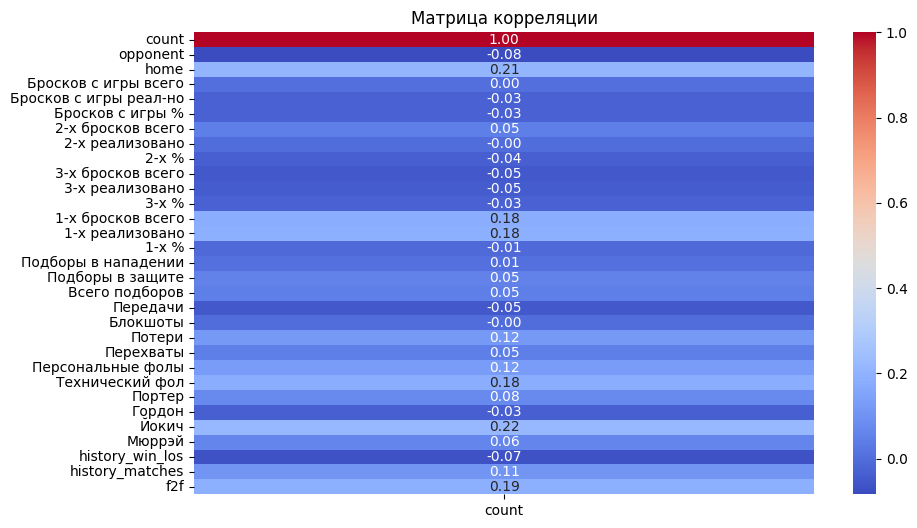

In [ ]:
correlation_matrix=df.corr()[['count']]


# Извлечение корреляции от 'count'
count_correlation = correlation_matrix[['count']]

# Печать корреляции с 'count'
print(count_correlation)

# Визуализация матрицы корреляции
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляции')
plt.show()

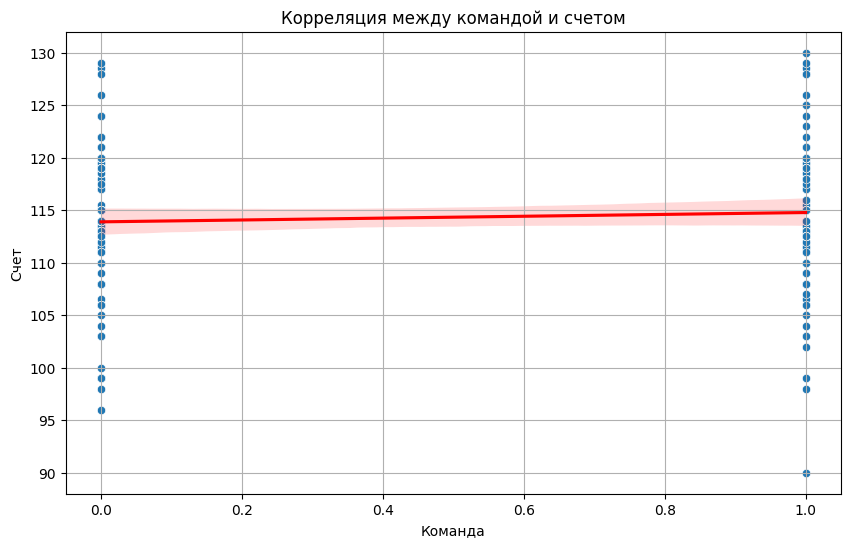

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_o, x='home', y='count')

sns.regplot(data=df_o, x='home', y='count', scatter=False, color='red')

plt.title('Корреляция между командой и счетом')
plt.xlabel('Команда')
plt.ylabel('Счет')
plt.grid(True)

plt.show()

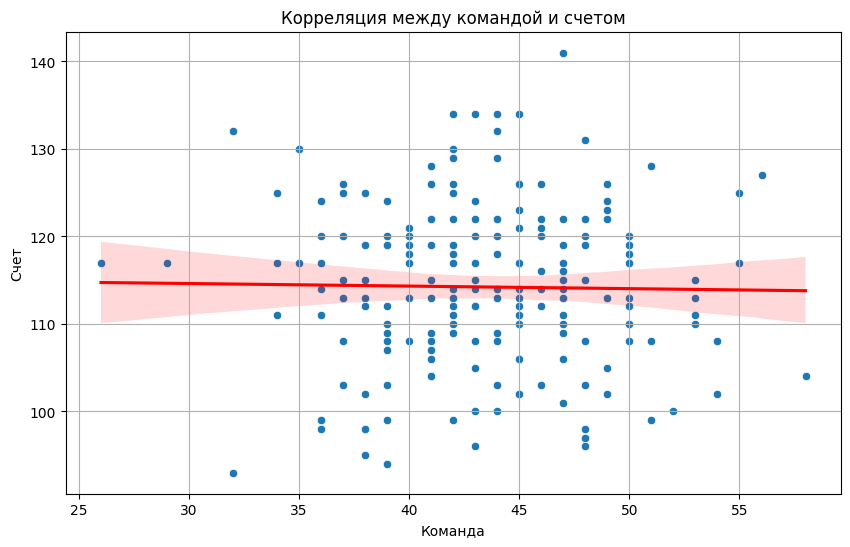

In [ ]:
x='Бросков с игры реал-но'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_o, x=x, y='count')

sns.regplot(data=df_o, x=x, y='count', scatter=False, color='red')

plt.title('Корреляция между командой и счетом')
plt.xlabel('Команда')
plt.ylabel('Счет')
plt.grid(True)

plt.show()

In [ ]:
df_o=df.copy()

In [ ]:
def remove_outliers(group):
    median = group['count'].median()
    d,u=group['count'].quantile([0.03, 0.97])
    group['count'] = group['count'].apply(lambda x: x if d<x<u  else median)
    return group

# Применяем функцию для каждой команды
df_o = df_o.groupby('home').apply(remove_outliers)

In [ ]:
df_o['count'].corr(df_o['Бросков с игры реал-но'])

-0.016572227923373192

In [ ]:
def new_opponent(group):
    median = group['count'].median()
    d,u=group['count'].quantile([0.15, 0.85])
    group['count'] = group['count'].apply(lambda x: x if d<x<u  else median)
    return group

def remove_home(group):
    median = group['count'].median()
    d,u=group['count'].quantile([0.03, 0.97])
    group['count'] = group['count'].apply(lambda x: x if d<x<u  else median)
    return group

# Применяем функцию для каждой команды
df = df.groupby('home').apply(remove_outliers)
df = df.groupby('opponent').apply(new_opponent)

In [ ]:
df

,count,opponent,home,Бросков с игры всего,Бросков с игры реал-но,Бросков с игры %,2-х бросков всего,2-х реализовано,2-х %,3-х бросков всего,...,Персональные фолы,Технический фол,Принс,Адетокунбо,Лопес,Лиллард,Трент,history_win_los,history_matches,f2f
date,,,,,,,,,,,,,,,,,,,,,
2024-10-11,102,4,1,86.0,30.0,34.9,38.0,11.0,28.9,48.0,...,20.0,0.0,1.124029,1.169314,1.141661,1.141661,1.064868,1,1,102.0
2024-10-15,111,7,1,87.0,40.0,46.0,58.0,27.0,46.6,29.0,...,18.0,1.0,1.124029,1.169314,1.141661,1.141661,1.064868,2,2,116.5
2024-10-18,84,2,0,86.0,37.0,43.0,52.0,26.0,50.0,34.0,...,22.0,1.0,1.124029,0.000000,0.000000,0.000000,1.064868,1,2,84.0
2024-10-24,124,6,0,94.0,35.0,37.2,59.0,24.0,40.7,35.0,...,20.0,0.0,1.124029,1.169314,1.141661,1.141661,1.064868,-1,2,124.0
2024-10-26,122,7,1,80.0,43.0,53.8,43.0,27.0,62.8,37.0,...,23.0,0.0,1.124029,1.169314,1.141661,1.141661,1.064868,1,2,111.0
2024-10-28,102,1,0,93.0,46.0,49.5,53.0,33.0,62.3,40.0,...,14.0,1.0,1.124029,1.169314,1.141661,1.141661,1.064868,-1,3,102.0
2024-10-29,108,0,0,74.0,33.0,44.6,41.0,23.0,56.1,33.0,...,17.0,0.0,1.124029,1.169314,1.141661,1.141661,1.064868,-2,3,108.0
2024-11-01,99,5,0,82.0,37.0,45.1,51.0,29.0,56.9,31.0,...,24.0,0.0,1.124029,1.169314,1.141661,1.141661,1.064868,-3,4,99.0
2024-11-03,113,3,1,96.0,41.0,42.7,54.0,32.0,59.3,42.0,...,27.0,0.0,1.124029,1.169314,1.141661,1.141661,1.064868,-4,5,113.5


In [ ]:
def new_data(predict,category, df, val_split, test_split):
    # Преобразуем категориальные переменные
    df_category = pd.concat([
        pd.get_dummies(df[col], prefix=col, drop_first=True, dtype=int) for col in category
    ], axis=1)

    for col in ['opponent_28','opponent_28','opponent_28','opponent_28','opponent_28','opponent_28','opponent_28','opponent_28',]:
        if col not in df_category.columns:
            df_category[col] = 0


    df=df.drop(columns=category)
    df = pd.concat([df, df_category], axis=1)

    df= df.sample(frac=1).reset_index(drop=True)
    y = df[predict].values.reshape(-1, 1)
    x = df.drop(columns=predict).values


    total_size = len(df)
    test_size = int(total_size * test_split)
    val_size = int(total_size * val_split)
    train_size = total_size - test_size - val_size

    x_train = x[:train_size]
    y_train = y[:train_size]

    x_val = x[train_size:train_size + val_size]
    y_val = y[train_size:train_size + val_size]

    x_test = x[train_size + val_size:]
    y_test = y[train_size + val_size:]

    return (np.array(x_train), np.array(y_train),
            np.array(x_val), np.array(y_val),
            np.array(x_test), np.array(y_test))


In [ ]:
val_split = 0.001
test_split = 0.99

x_train, y_train, x_val, y_val, x_test, y_test = new_data(['count'],['opponent'], df, val_split, test_split)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

x_scaler = MinMaxScaler()
x_train = x_scaler.fit_transform(x_train)
x_val = x_scaler.transform(x_val)

y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train)
y_val = y_scaler.transform(y_val)

In [ ]:
x_test.shape

(20, 57)

#Тренировка модели

In [ ]:
input = Input((x_train.shape[1],))


# Первый вход для числовых данных
x = input
x = Dense(1024, activation="relu")(x)
x= BatchNormalization()(x)
x = Dense(500, activation="relu")(x)
x = Dense(200, activation="relu")(x)
x = Dense(124, activation='relu')(x)
x = Dense(62, activation='relu')(x)
# x = Dropout(0.2)(x)

# Финальный регрессирующий нейрон
x = Dense(1, activation='linear')(x)

# В Model передаются входы и выход
model = Model((input), x)

# model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.compile(optimizer=Adam(learning_rate=1e-5), loss='mse', metrics=['mae'])


In [ ]:
import keras
callbacks = [
    keras.callbacks.ModelCheckpoint(filepath = './best_model.keras',
                             monitor = 'val_loss',
                             save_best_only = True,
                             mode = 'min',
                             verbose = 0),
]
history = model.fit([x_train],
                           y_train,
                           batch_size=18,
                           epochs=200,
                           validation_data=([x_val], y_val),
                           verbose=1,callbacks=callbacks)

Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 1.6190 - mae: 0.9609 - val_loss: 0.4710 - val_mae: 0.5694
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.1921 - mae: 0.8448 - val_loss: 0.4711 - val_mae: 0.5715
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.2379 - mae: 0.8238 - val_loss: 0.4713 - val_mae: 0.5732
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.0053 - mae: 0.7254 - val_loss: 0.4713 - val_mae: 0.5740
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.0261 - mae: 0.7579 - val_loss: 0.4710 - val_mae: 0.5742
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.0997 - mae: 0.7508 - val_loss: 0.4712 - val_mae: 0.5746
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.8820 - mae: 0.6924 - val_loss: 0.4713 - val_mae: 0.5749
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.9077 - mae: 0.7163 - val_loss: 0.4713 - val_mae: 0.5749
Epoch 9/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - lo

In [ ]:
model = keras.saving.load_model('best_model.keras')
# model = keras.saving.load_model('Model_MLP.keras')

#Результаты

In [ ]:
pred=model.predict([x_scaler.transform(x_test)])
pred = y_scaler.inverse_transform(pred)
print('Средняя абсолютная ошибка:', mean_absolute_error(pred, y_test), '\n')
print('Средний процент ошибки на тестовой выборке:', sum([abs(y_test[i, 0] - pred[i, 0])/y_test[i, 0]*100 for i in range(len(y_test))])/len(y_test),'%', '\n')
res=[abs(y_test[i, 0] - pred[i, 0])/y_test[i, 0]*100 for i in range(len(y_test))]
res

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
Средняя абсолютная ошибка: 7.388894653320312 

Средний процент ошибки на тестовой выборке: 6.728601008238779 % 



[3.601430257161458,
 10.938120600002915,
 0.23543899123733109,
 7.335075965294472,
 3.396549931278935,
 1.4455931527273995,
 2.5110193201013513,
 7.227528095245361,
 9.382746170978157,
 36.12993240356445,
 6.604144642653975,
 1.7094908642167803,
 17.241061573297205,
 4.751351614978826,
 3.743661244710286,
 1.1526542797423247,
 7.362446418175331,
 2.16419187366453,
 1.4125960213797433,
 6.226986744364754]